<a href="https://colab.research.google.com/github/tvut/mais/blob/main/Garbage_Collection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install kaggle and setup my config file. This will probably be need to run twice so the directory is created.

In [2]:
api_token = {"username":"tristanssdfasdf","key":"60aac443aa53780276ab45e3ece8082f"}
import json
import zipfile
import os
!kaggle

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 /root/.kaggle/kaggle.json

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: the following arguments are required: command


Use kaggle to download the dataset.

In [ ]:
!kaggle config path -p /content
!kaggle datasets download -d mostafaabla/garbage-classification
!unzip /content/garbage-classification.zip

Import requirements.

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

Checks that our data is actually here. Data length is known and we open an image just to make sure its there.

15515 images found.


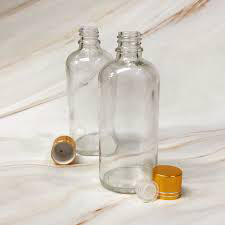

In [8]:
import os,glob

dir_path = 'garbage_classification'
img_list = glob.glob(os.path.join(dir_path, '*/*.jpg'))
len(img_list)

print(f"{len(img_list)} images found.")
assert (len(img_list) == 15515)

import PIL
PIL.Image.open(str(img_list[0]))


Importing the data using the built in dataset from directory generator as specified in the [docs](https://www.tensorflow.org/tutorials/load_data/images#:~:text=Note%3A%20You%20previously%20resized%20images%20using%20the%20image_size,the%20tf.keras.layers.Resizing%20layer.%20Configure%20the%20dataset%20for%20performance).

This resizes our data and handles the validation data split. Note that seeds need to be the same for the validation set to be the same.

Found 15515 files belonging to 12 classes.
Using 12412 files for training.

Found 15515 files belonging to 12 classes.
Using 3103 files for validation.

Classes:


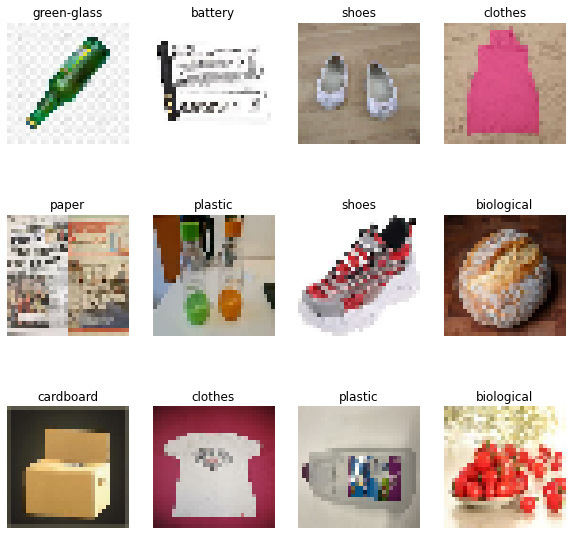

In [31]:
td = tf.keras.utils.image_dataset_from_directory(
    dir_path,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(32, 32),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

print()

vd = tf.keras.utils.image_dataset_from_directory(
    dir_path,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(32, 32),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)
import matplotlib.pyplot as plt

print("\nClasses:")
plt.figure(figsize=(10, 10))
for images, labels in td.take(1):
  for i in range(len(td.class_names)):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(td.class_names[labels[i]])
    plt.axis("off")

In [32]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [35]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(10))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [36]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(td, batch_size=32, epochs=10, validation_data=(vd))

Epoch 1/10
388/388 [==============================] - 40s 101ms/step - loss: 2.7652 - accuracy: 0.3955 - val_loss: 1.5769 - val_accuracy: 0.5092
Epoch 2/10
388/388 [==============================] - 53s 135ms/step - loss: 1.4195 - accuracy: 0.5359 - val_loss: 1.3665 - val_accuracy: 0.5482
Epoch 3/10
388/388 [==============================] - 47s 120ms/step - loss: 1.2353 - accuracy: 0.5934 - val_loss: 1.2095 - val_accuracy: 0.6023
Epoch 4/10
388/388 [==============================] - 54s 139ms/step - loss: 1.1115 - accuracy: 0.6350 - val_loss: 1.1885 - val_accuracy: 0.6142
Epoch 5/10
388/388 [==============================] - 51s 131ms/step - loss: 1.0333 - accuracy: 0.6613 - val_loss: 1.1528 - val_accuracy: 0.6300
Epoch 6/10
388/388 [==============================] - 47s 119ms/step - loss: 0.9758 - accuracy: 0.6743 - val_loss: 1.1559 - val_accuracy: 0.6391
Epoch 7/10
388/388 [==============================] - 42s 108ms/step - loss: 0.8972 - accuracy: 0.6946 - val_loss: 1.1603 - val_ac